In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import euclidean_distances
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/DRUG1n.csv')

In [17]:
data_encode = data.copy()

# 数值的映射
p_class_map_sex = {label: idx for idx, label in enumerate(set(data['Sex']))}
p_class_map_bp = {label: idx for idx, label in enumerate(set(data['BP']))}
p_class_map_cholesterol = {label: idx for idx, label in enumerate(set(data['Cholesterol']))}
data_encode['Sex'] = data['Sex'].map(p_class_map_sex)
data_encode['BP'] = data['BP'].map(p_class_map_bp)
data_encode['Cholesterol'] = data['Cholesterol'].map(p_class_map_cholesterol)

# OneHot编码
data_encode = data_encode.drop(['Drug'], axis=1)
df = pd.get_dummies(data['Drug'], columns=np.unique(data['Drug'].values)).reset_index(drop=True)
data_encode = pd.concat([data_encode, df], axis=1)
data_encode.head(5)

,Age,Sex,BP,Cholesterol,Na,K,drugA,drugB,drugC,drugX,drugY
0,23,0,0,0,0.792535,0.031258,0,0,0,0,1
1,47,1,1,0,0.739309,0.056468,0,0,1,0,0
2,47,1,1,0,0.697269,0.068944,0,0,1,0,0
3,28,0,2,0,0.563682,0.072289,0,0,0,1,0
4,61,0,1,0,0.559294,0.030998,0,0,0,0,1


In [62]:
def draw(data_set, cluster):
    standard_point = np.zeros((1, np.shape(data_set)[1]))
    for i in range(cluster.max() + 1):
        plt.scatter(euclidean_distances(standard_point, data_set[cluster == i]), cluster[cluster == i])
    if sum(cluster == -1) > 0:
        plt.scatter(euclidean_distances(standard_point, data_set[cluster == -1]), cluster[cluster == -1], c='black')
    plt.xlabel('standard euclidean distance')
    plt.ylabel('classification')
    plt.yticks(np.arange(cluster.min(), cluster.max() + 1))

{'algorithm': 'auto',
 'eps': 1,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

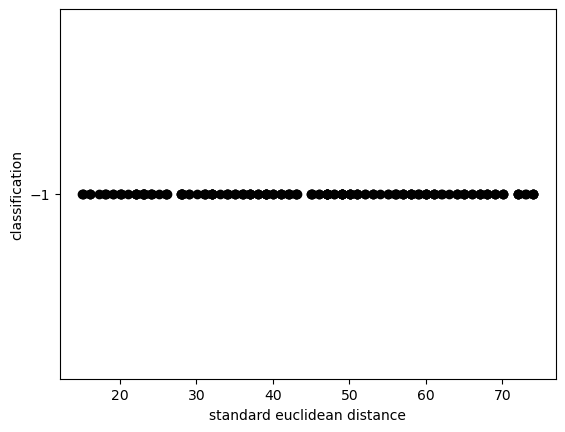

In [63]:
dbscan = DBSCAN(1)
clustering = dbscan.fit(data_encode)
draw(data_encode.to_numpy(), clustering.labels_)
clustering.get_params()

{'algorithm': 'auto',
 'eps': 1.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

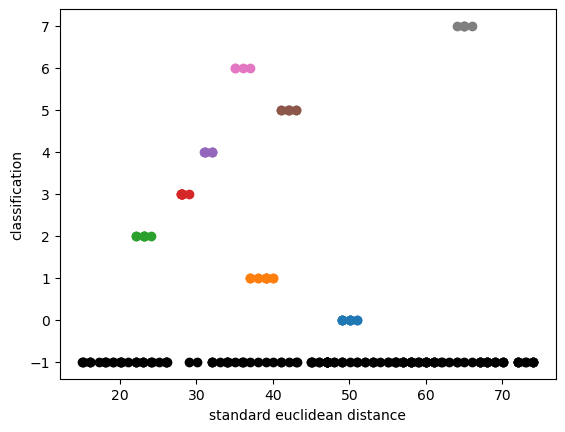

In [64]:
dbscan = DBSCAN(eps=1.5)
clustering = dbscan.fit(data_encode)
draw(data_encode.to_numpy(), clustering.labels_)
clustering.get_params()

{'algorithm': 'auto',
 'eps': 2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

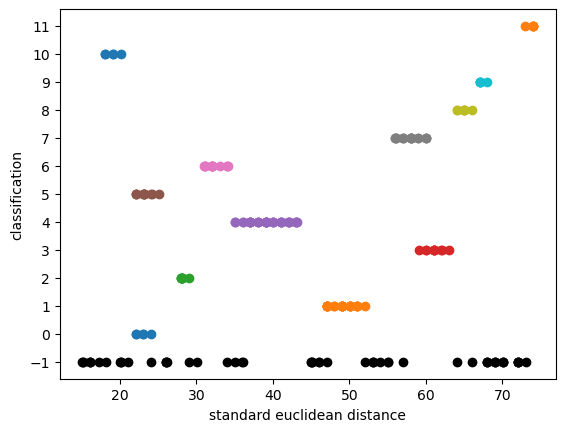

In [65]:
dbscan = DBSCAN(eps=2)
clustering = dbscan.fit(data_encode)
draw(data_encode.to_numpy(), clustering.labels_)
clustering.get_params()

{'algorithm': 'auto',
 'eps': 2.1,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

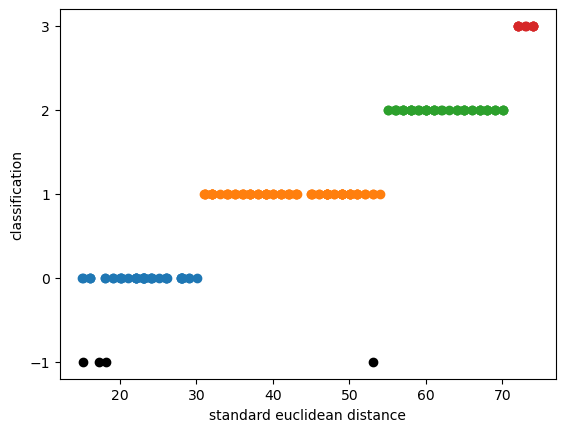

In [66]:
dbscan = DBSCAN(eps=2.1)
clustering = dbscan.fit(data_encode)
draw(data_encode.to_numpy(), clustering.labels_)
clustering.get_params()